## Import and examine the dataset

In [65]:
import numpy as np
import pandas as pd

In [66]:
df = pd.read_csv("./dataset.csv")

In [67]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [68]:
df.shape

(6362620, 11)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [70]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [71]:
df[df['amount'] > df['amount'].quantile(0.90)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
84,1,TRANSFER,379856.23,C1449772539,0.00,0.0,C1590550415,900180.00,19169204.93,0,0
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0
86,1,TRANSFER,554026.99,C1603696865,0.00,0.0,C766572210,579285.56,0.00,0,0
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19169204.93,0,0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


## Checking for null values

In [73]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

No null values detected, that's good!

## Examine a few columns

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [77]:
fraud = df.isFraud.value_counts()

In [78]:
fraud_idx = fraud.index
fraud_idx

Index([0, 1], dtype='int64', name='isFraud')

In [79]:
fraud_val = fraud.values
fraud_val

array([6354407,    8213], dtype=int64)

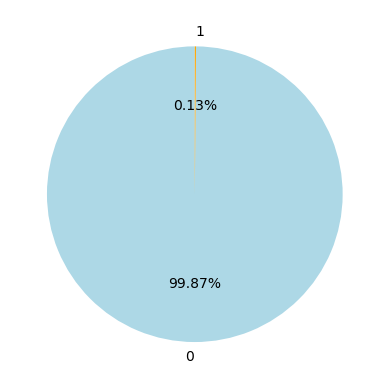

In [208]:
colors = ['lightblue', 'orange']

plt.pie(fraud_val,
        labels=fraud_idx,
        autopct='%1.2f%%',
        startangle=90,
        colors = colors
       )
plt.show()

In [81]:
isfraud = df[['isFlaggedFraud','isFraud']].value_counts().iloc[1:3].reset_index()
isfraud

,isFlaggedFraud,isFraud,count
0,0,1,8197
1,1,1,16


In [82]:
(16 / (8197 + 16))*100

0.1948131011810544

In [83]:
df_subset = df[df['isFraud'] == 1]
df_subset

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.0,C38997010,21182.00,0.00,1,0
251,1,TRANSFER,2806.00,C1420196421,2806.00,0.0,C972765878,0.00,0.00,1,0
252,1,CASH_OUT,2806.00,C2101527076,2806.00,0.0,C1007251739,26202.00,0.00,1,0
680,1,TRANSFER,20128.00,C137533655,20128.00,0.0,C1848415041,0.00,0.00,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [84]:
flagged_fraud = df_subset.isFlaggedFraud.value_counts()

In [85]:
flagged_fraud_idx = flagged_fraud.index
flagged_fraud_idx

Index([0, 1], dtype='int64', name='isFlaggedFraud')

In [86]:
flagged_fraud_val = flagged_fraud.values
flagged_fraud_val

array([8197,   16], dtype=int64)

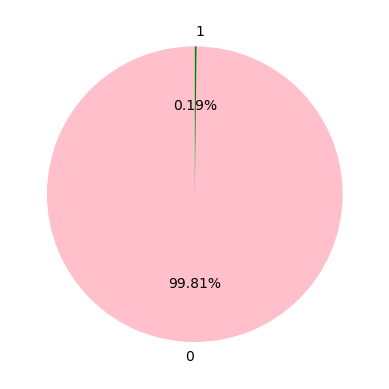

In [204]:
colors_1 = ['pink', 'green']

plt.pie(flagged_fraud_val,
        labels=flagged_fraud_idx,
        autopct='%1.2f%%',
        startangle=90,
        colors=colors_1
       )
plt.show()

## Exploratory Analysis

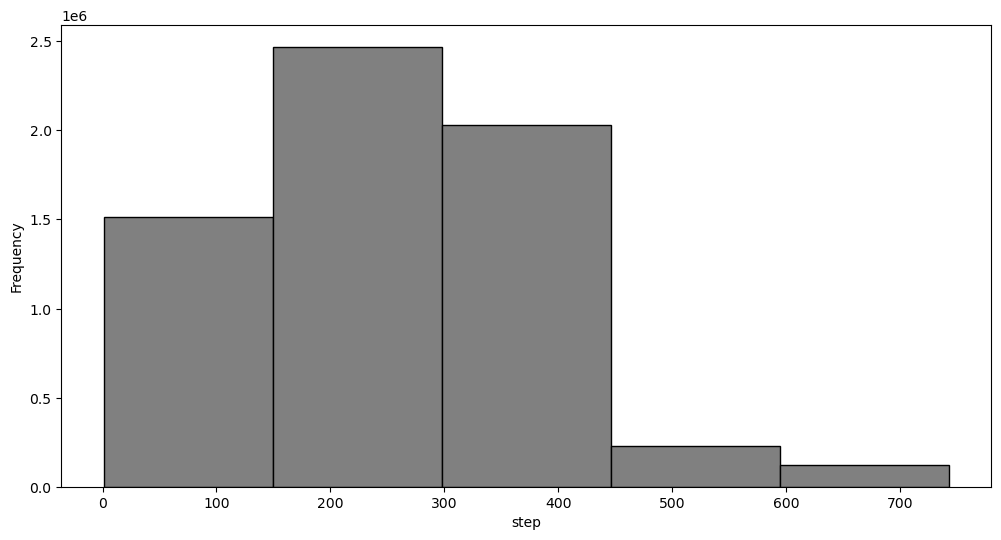

Skewness value:  0.37517688846984765




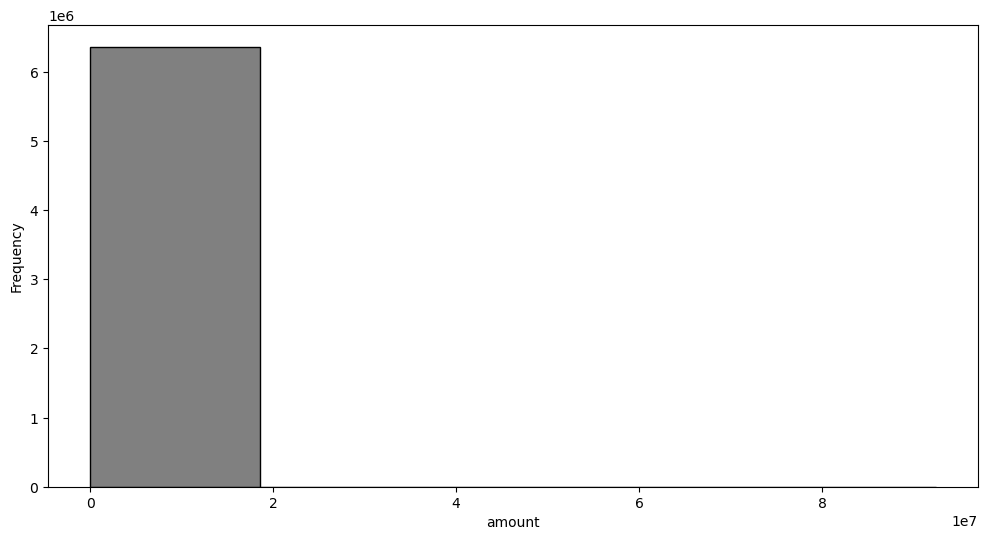

Skewness value:  30.99394948249038




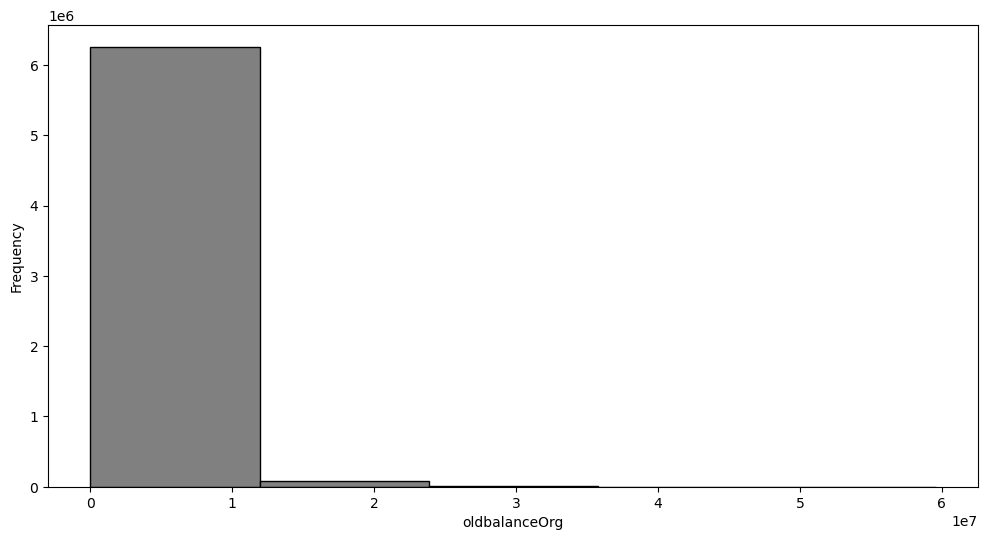

Skewness value:  5.249136420603121




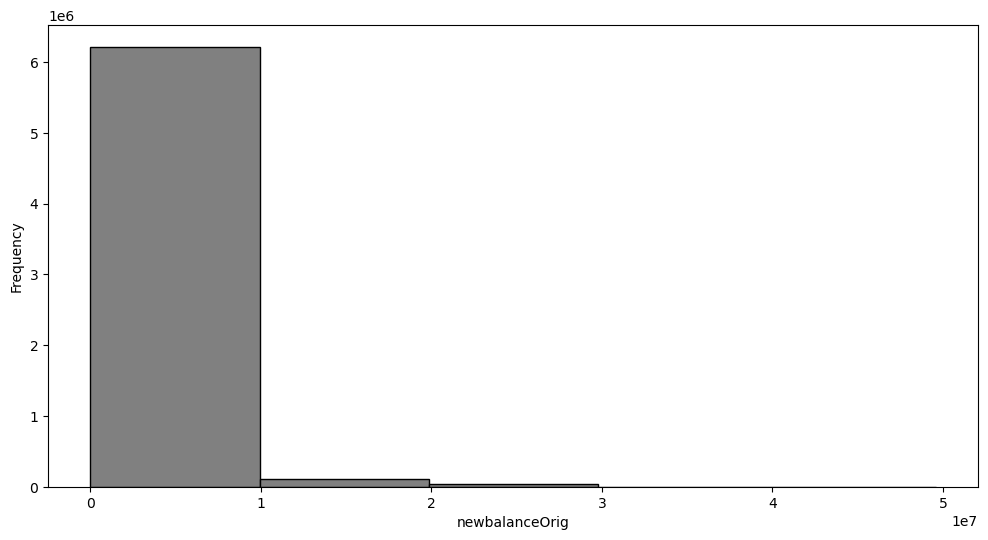

Skewness value:  5.176884001159233




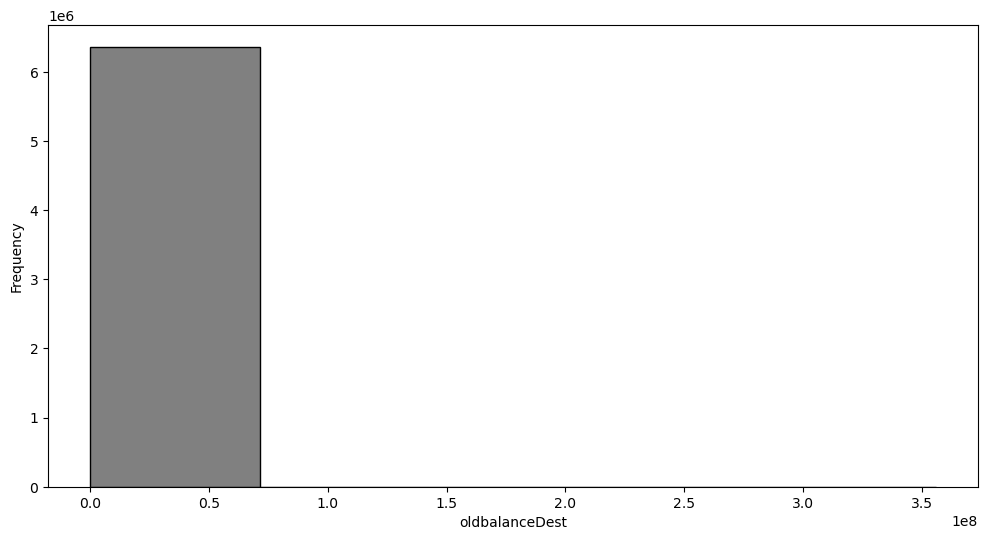

Skewness value:  19.921757915791062




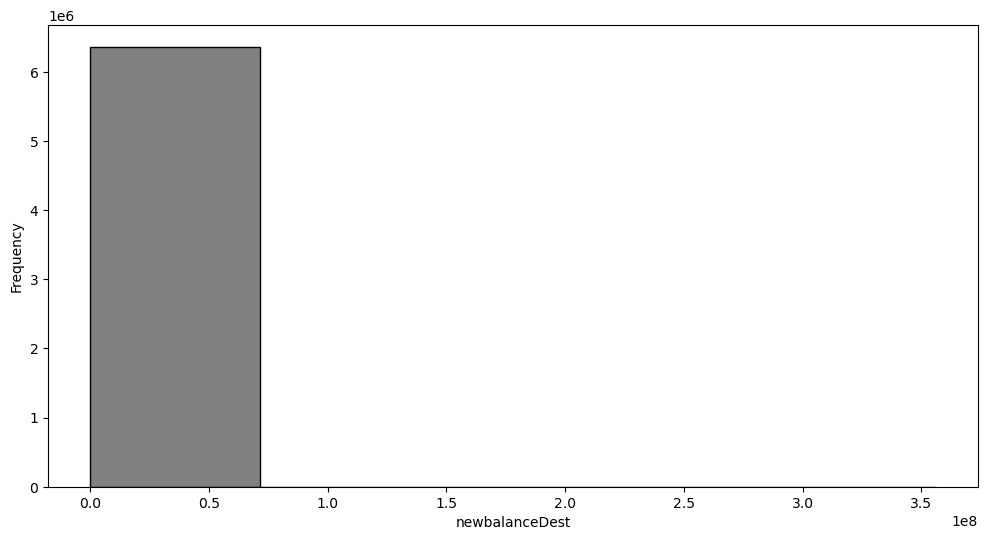

Skewness value:  19.352302057660165




In [96]:
feature=['step','amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.xlabel(i)
    plt.show()
    print('Skewness value: ',df[i].skew())
    print('\n')

In [98]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    print(i)
    print(df[i].quantile(0.10))
    print(df[i].quantile(0.90))

    print('\n')

amount
4501.3
365423.30900000007


oldbalanceOrg
0.0
1822508.289000007


newbalanceOrig
0.0
1970344.7930000005


oldbalanceDest
0.0
2914266.6690000016


newbalanceDest
0.0
3194869.671000002




In [100]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    lower = df[i].quantile(0.10)
    upper = df[i].quantile(0.90)
    df[i] = np.where(df[i] <lower, lower,df[i])
    df[i] = np.where(df[i] >upper, upper,df[i])
    print('Feature: ',i)
    print('Skewness value: ',df[i].skew())
    print('\n')

Feature:  amount
Skewness value:  0.8046460444556197


Feature:  oldbalanceOrg
Skewness value:  2.249361299814406


Feature:  newbalanceOrig
Skewness value:  2.2262847493216786


Feature:  oldbalanceDest
Skewness value:  1.4173123924260833


Feature:  newbalanceDest
Skewness value:  1.3593024983493058




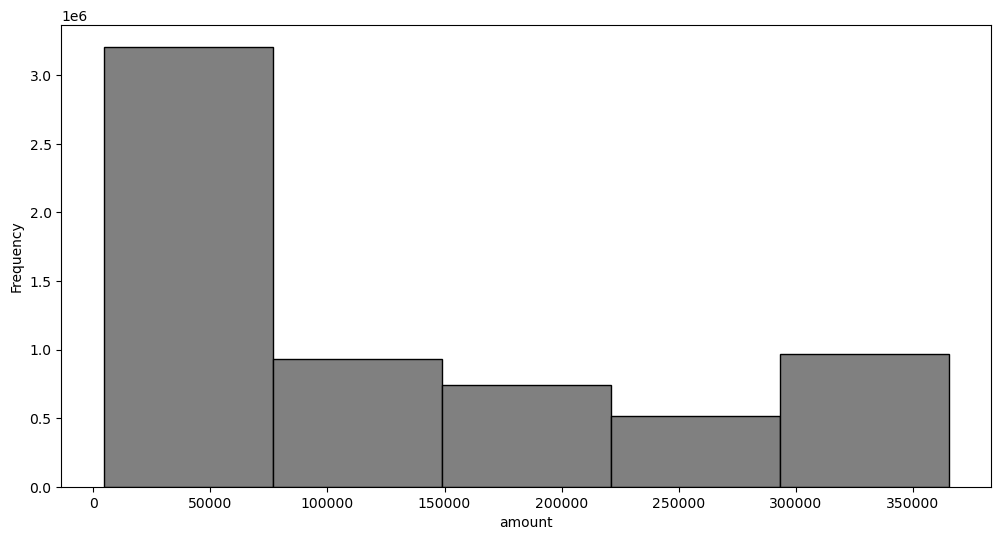

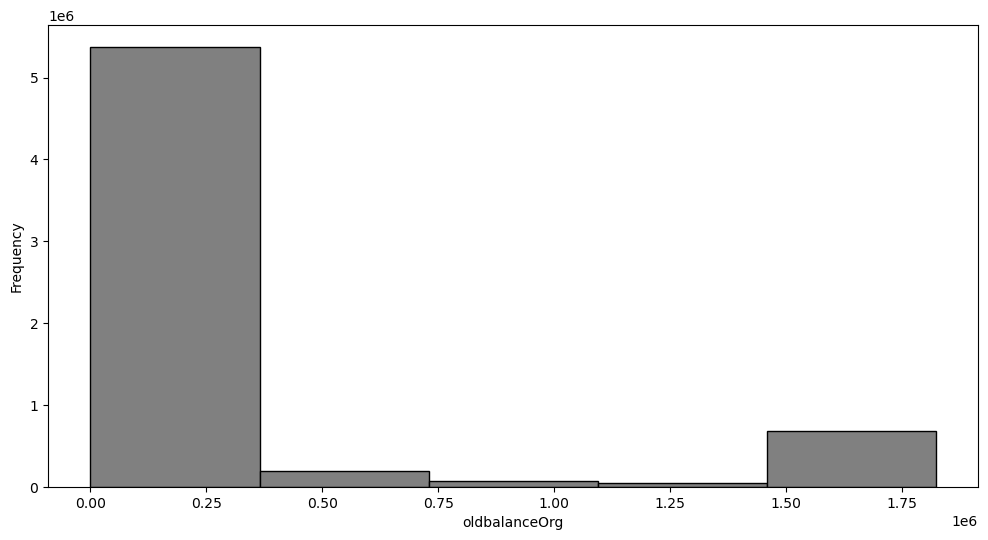

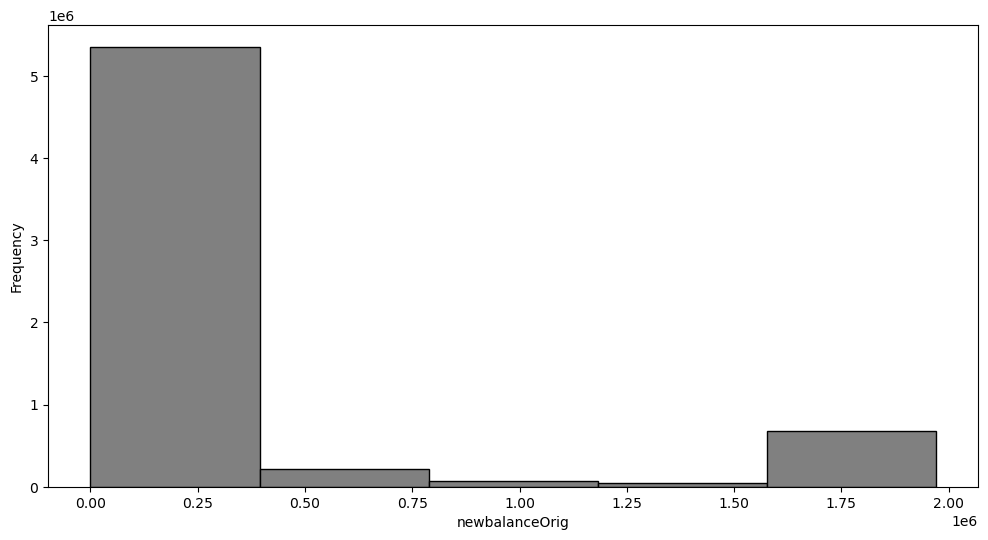

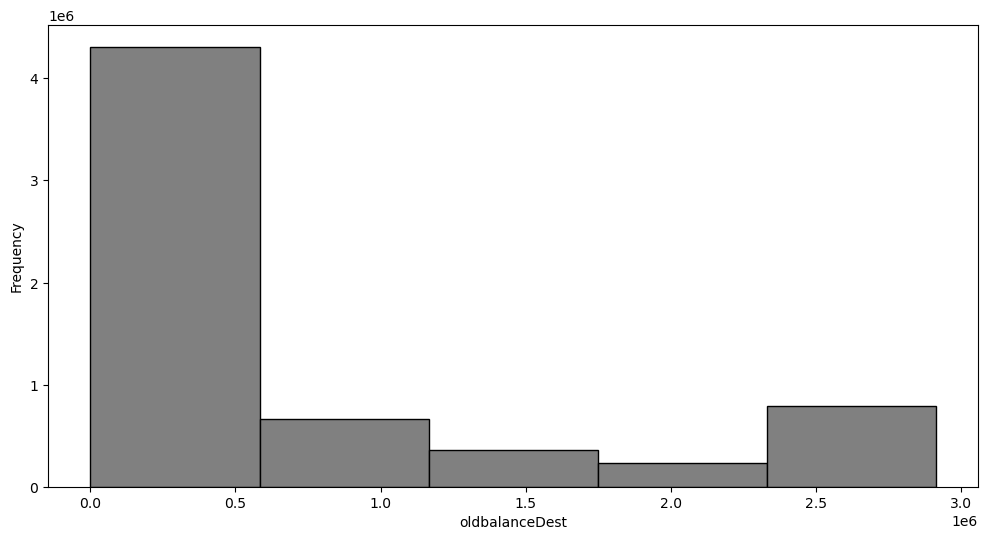

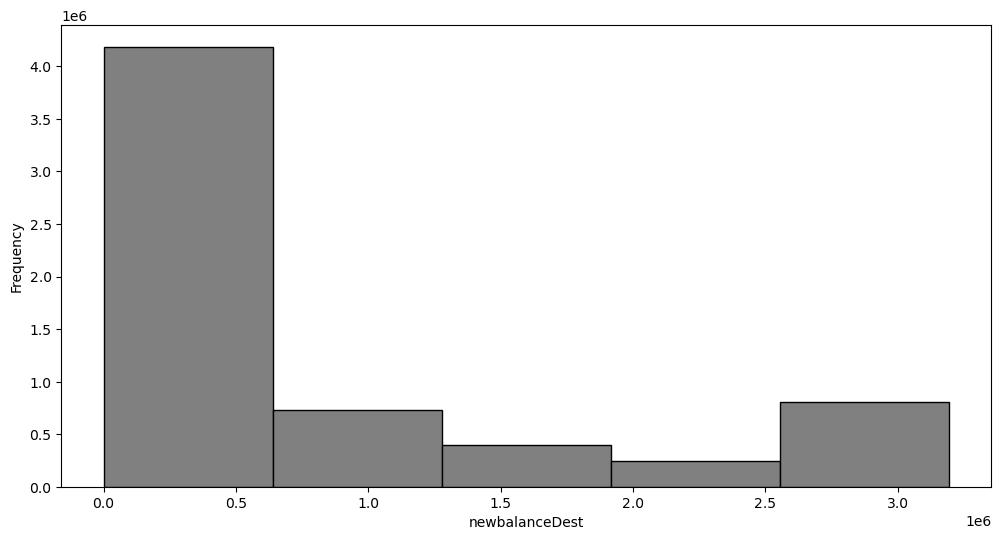

In [102]:
feature=['amount','oldbalanceOrg','newbalanceOrig','oldbalanceDest','newbalanceDest']

for i in feature:
    df[i].plot(kind='hist', bins=5, figsize=(12,6), facecolor='grey',edgecolor='black')
    plt.xlabel(i)
    plt.show()

Type

In [105]:
df['type']

0           PAYMENT
1           PAYMENT
2          TRANSFER
3          CASH_OUT
4           PAYMENT
             ...   
6362615    CASH_OUT
6362616    TRANSFER
6362617    CASH_OUT
6362618    TRANSFER
6362619    CASH_OUT
Name: type, Length: 6362620, dtype: object

In [106]:
df['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

<Axes: xlabel='type', ylabel='count'>

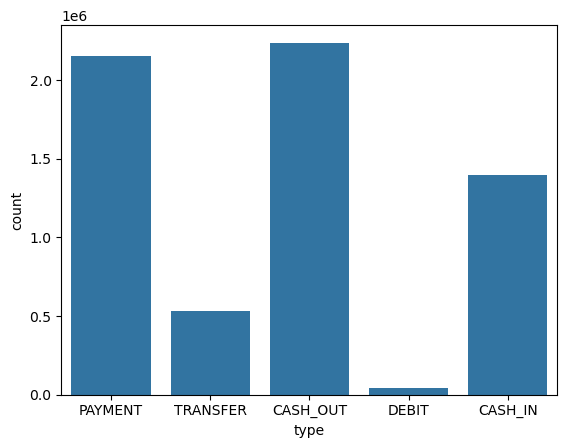

In [107]:
sns.countplot(x='type', data=df)

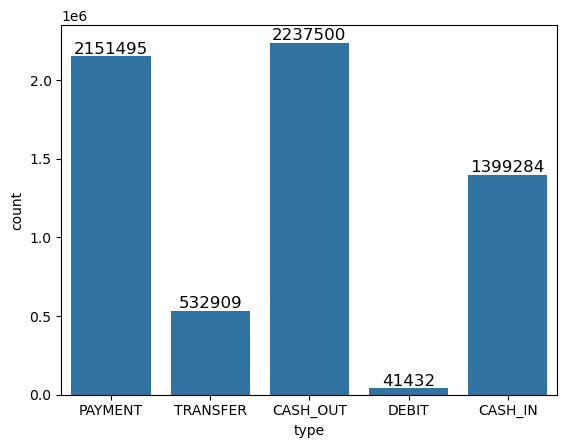

In [108]:

ax = sns.countplot(x='type', data=df)

# Annotate each bar with the y-value (count)
for p in ax.patches:
    count = int(p.get_height())
    ax.annotate(f'{count}',  # The height of the bar is the count
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Position the annotation at the top of the bar
                ha='center', va='center',  # Align the text in the center
                fontsize=12, color='black',  # Set font size and color
                xytext=(0, 5), textcoords='offset points')  # Offset the text slightly above the bar

# Show the plot
plt.show()


In [150]:
result=pd.crosstab(index=df.type,columns=df.isFraud)
result

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


<Axes: xlabel='type'>

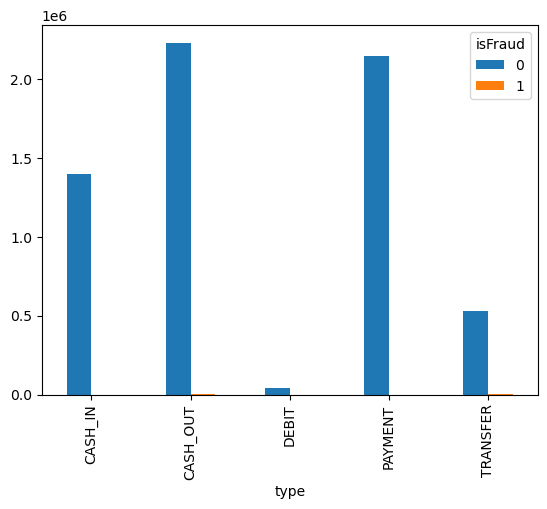

In [152]:
result.plot.bar()

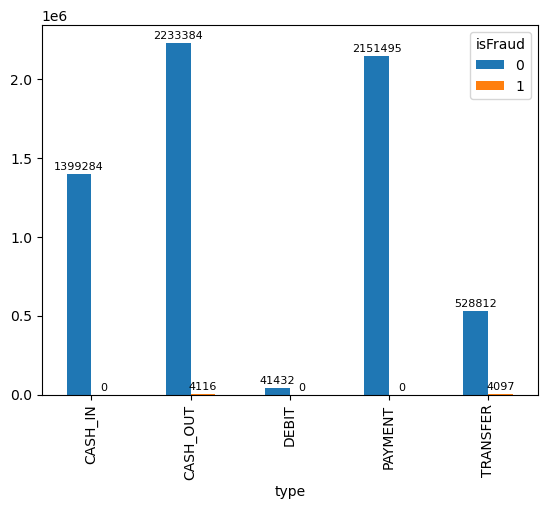

In [136]:
ax = result.plot.bar()

# Add the y-values on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', 
                va='center', 
                fontsize=8, 
                color='black', 
                xytext=(0, 5),  # 5 points vertical offset
                textcoords='offset points')

# Show the plot
plt.show()

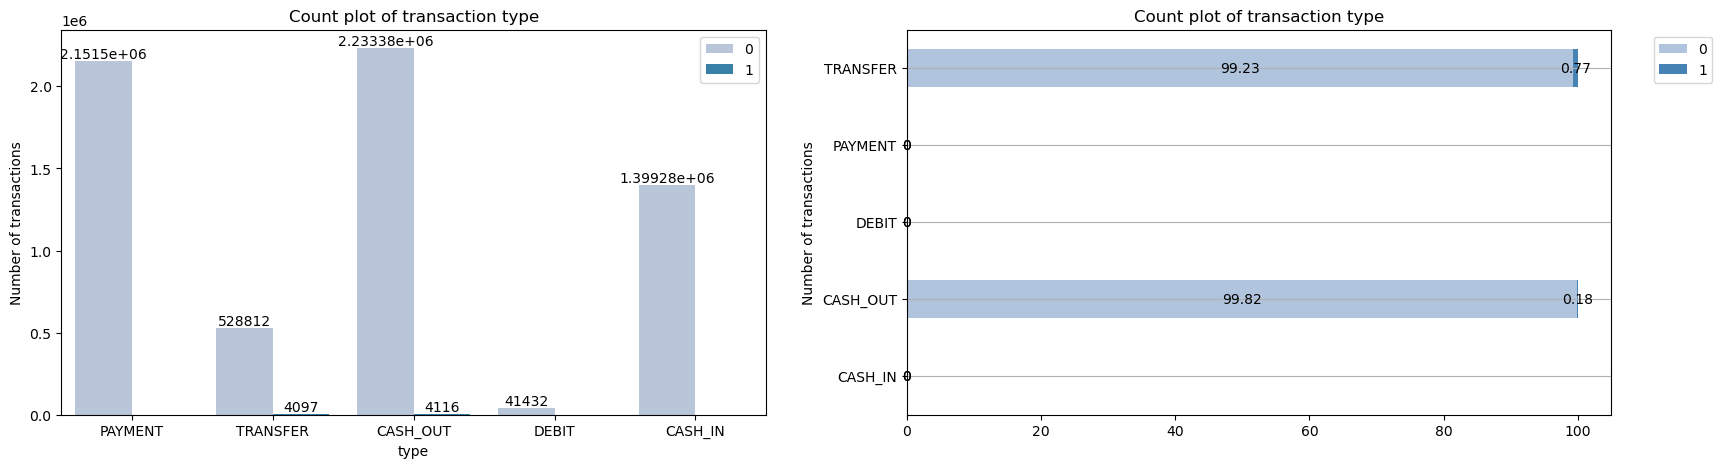

In [144]:
fig, ax = plt.subplots(1,2,figsize=(20,5))

sns.countplot(x='type', data=df, hue='isFraud', palette='PuBu', ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container)
ax[0].set_title('Count plot of transaction type')
ax[0].legend(loc='best')
ax[0].set_ylabel('Number of transactions')

df2 = df.groupby(['type', 'isFraud']).size().unstack()
df2.apply(lambda x : round((x/sum(x))*100, 2), axis=1).plot(kind='barh', stacked=True, color=['lightsteelblue', 'steelblue'], ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container, label_type='center')
ax[1].set_title('Count plot of transaction type')
ax[1].legend(bbox_to_anchor=(1.05,1), loc='upper left')
ax[1].set_ylabel('Number of transactions')
ax[1].grid(axis='y')


Amount

<Axes: title={'center': 'amount'}, xlabel='isFraud'>

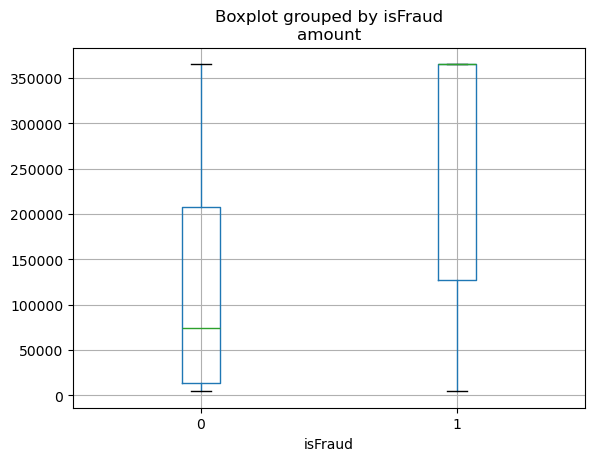

In [112]:
df.boxplot(column='amount', by='isFraud')

In [113]:
fraud_amount= df[df.isFraud==1]
fraud_amount=fraud_amount.sort_values(by=['amount'],ascending=False)
fraud_amount

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
5188057,367,CASH_OUT,365423.309,C1210833971,435867.160,0.000,C363013236,186826.40,622693.550,1,0
5990227,416,CASH_OUT,365423.309,C2110305720,1822508.289,0.000,C225008798,523626.59,3194869.671,1,0
5990225,416,CASH_OUT,365423.309,C246726057,1822508.289,0.000,C1786144514,2423749.18,3194869.671,1,0
5990224,416,TRANSFER,365423.309,C298387535,1822508.289,1970344.793,C662194461,0.00,0.000,1,0
5988262,415,CASH_OUT,365423.309,C2137951962,1675153.280,0.000,C309573869,12832.26,1687985.530,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6002113,428,CASH_OUT,4501.300,C1838531308,3037.670,0.000,C505532836,800854.71,803892.380,1,0
6002112,428,TRANSFER,4501.300,C1408814433,3037.670,0.000,C944070846,0.00,0.000,1,0
1796322,162,TRANSFER,4501.300,C1172437299,151.000,0.000,C315826176,0.00,0.000,1,0
1796323,162,CASH_OUT,4501.300,C790340353,151.000,0.000,C517676411,386163.34,386314.340,1,0


<Axes: ylabel='Frequency'>

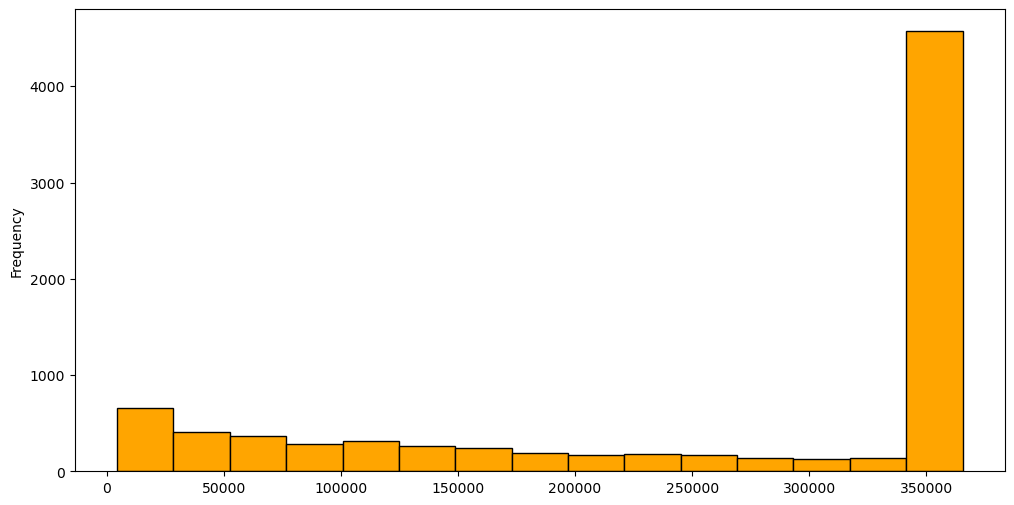

In [114]:
fraud_amount.amount.plot(kind='hist', bins=15, figsize=(12,6), facecolor='orange',edgecolor='black')

nameDest

In [148]:
fraudster= df_subset.nameDest.value_counts()


In [174]:
fraud_id=pd.crosstab(index=df.nameDest,columns=df.isFraud)


In [184]:
fraud_id

isFraud,0,1
nameDest,,
C1000004082,6,0
C1000004940,13,0
C1000013769,13,0
C100001587,9,0
C1000015936,16,0
...,...,...
M999998692,1,0
M99999900,1,0
M999999089,1,0


In [182]:
df[df['isFraud'] ==1]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,4501.300,C1305486145,181.000,0.0,C553264065,0.000,0.000,1,0
3,1,CASH_OUT,4501.300,C840083671,181.000,0.0,C38997010,21182.000,0.000,1,0
251,1,TRANSFER,4501.300,C1420196421,2806.000,0.0,C972765878,0.000,0.000,1,0
252,1,CASH_OUT,4501.300,C2101527076,2806.000,0.0,C1007251739,26202.000,0.000,1,0
680,1,TRANSFER,20128.000,C137533655,20128.000,0.0,C1848415041,0.000,0.000,1,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.130,C786484425,339682.130,0.0,C776919290,0.000,339682.130,1,0
6362616,743,TRANSFER,365423.309,C1529008245,1822508.289,0.0,C1881841831,0.000,0.000,1,0
6362617,743,CASH_OUT,365423.309,C1162922333,1822508.289,0.0,C1365125890,68488.840,3194869.671,1,0
6362618,743,TRANSFER,365423.309,C1685995037,850002.520,0.0,C2080388513,0.000,0.000,1,0


In [194]:
fraud_id[fraud_id[1] > 0].sort_values(1, ascending=False)

isFraud,0,1
nameDest,,
C2020337583,39,2
C650699445,7,2
C475338087,19,2
C505532836,4,2
C1185292292,4,2
...,...,...
C1661119285,21,1
C1661087818,18,1
C1660826618,13,1


In [196]:
fraud_id[fraud_id[1] > 0].sort_values(0, ascending=False).iloc[:11]

isFraud,0,1
nameDest,,
C716083600,88,1
C667346055,85,1
C932583850,81,1
C766681183,79,1
C803116137,75,2
C991505714,71,1
C1481851679,66,1
C2094777811,64,1
C1181708889,62,1


In [117]:
#next step

In [118]:
#three machine learning model
#knn
#logistics regression
#gaussiannb